In [21]:
import pandas as pd
import sweetviz as sv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from icecream import ic
import warnings
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
warnings.filterwarnings('ignore')

In [22]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Capstone Project/Databases')

In [23]:
os.listdir()

['businesscategories_tocsv.csv',
 'city-wards-data-4326.geojson',
 'dataframe_withlocations.csv',
 'db_filtered_NoNAs.csv',
 'db_filtered_wNAs.csv',
 'df_icecream.csv',
 'df_other.csv',
 'final_df_wcategories.csv',
 'iterated_cat.csv',
 'ODBus_v1.csv',
 'Other Databases',
 'sample.csv',
 'SWEETVIZ_REPORT.html',
 'toronto data.csv',
 'toronto_df_locations.csv',
 'vancouver data.csv']

In [24]:
# Cargar el GeoJSON de los wards
gdf_wards = gpd.read_file('city-wards-data-4326.geojson')

# Cargar los datos de coordenadas
df_coords = pd.read_csv('final_df_wcategories.csv')

In [25]:
# Asumiendo que las columnas se llaman 'latitud' y 'longitud'
geometry = [Point(xy) for xy in zip(df_coords['longitude'], df_coords['latitude'])]
gdf_coords = gpd.GeoDataFrame(df_coords, geometry=geometry)

# Asumimos que el CRS de tus datos es WGS84 (el más común para latitud/longitud)
gdf_coords.crs = 'epsg:4326'

# Si el CRS de gdf_wards es diferente, realiza una transformación de CRS
gdf_coords = gdf_coords.to_crs(gdf_wards.crs)

In [26]:
join = gpd.sjoin(gdf_coords, gdf_wards, how="left", op="within")
join

,Unnamed: 0,BusinessNo,Category_Vendor,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,...,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,OBJECTID
0,0,0,mobile vending (food truck),R54-4422459,NaN,2014-05-16,"Ahmadzadeh-Razavi, Mahnaz",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,mobile vending (food truck),R54-4422376,NaN,2014-05-15,Tang'S Family Restaurant Corp,NaN,NaN,NaN,...,,22,22,Scarborough-Agincourt,Scarborough-Agincourt (22),0.0,,279754.0,-1.0,17344945.0
2,2,2,mobile vending (food truck),R54-4424708,NaN,2014-07-09,"Insrichiengmai, Susan",NaN,NaN,NaN,...,,04,04,Parkdale-High Park,Parkdale-High Park (4),0.0,,279754.0,-1.0,17344993.0
3,3,3,mobile vending (food truck),R54-4422377,NaN,2014-05-15,1459949 Ontario Inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,mobile vending (food truck),R54-4422545,NaN,2014-05-20,2397349 Ontario Inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,474,754,mobile vending (ice cream truck),R56-5318650,Sweet Summer Soft Ice,2023-05-01,1532272 Ontario Corp,NaN,NaN,NaN,...,,05,05,York South-Weston,York South-Weston (5),0.0,,279754.0,-1.0,17345137.0
3328,475,755,mobile vending (ice cream truck),R56-5318652,Sweet Summer Soft Icecream,2023-05-01,1532272 Ontario Corp,NaN,NaN,NaN,...,,05,05,York South-Weston,York South-Weston (5),0.0,,279754.0,-1.0,17345137.0
3329,476,756,mobile vending (ice cream truck),R56-5342113,Mrs Softy,2023-07-26,Mrs Softy Inc,NaN,NaN,NaN,...,,06,06,York Centre,York Centre (6),0.0,,279754.0,-1.0,17344801.0
3330,477,757,mobile vending (ice cream truck),R56-5343744,Master Soft & Delight Dairy Products,2023-07-26,Master Soft & Delight Dairy Products Inc,NaN,NaN,NaN,...,,20,20,Scarborough Southwest,Scarborough Southwest (20),0.0,,279754.0,-1.0,17344865.0


In [27]:
# Ejemplo de cómo eliminar una columna innecesaria
join.drop(columns=['index_right'], inplace=True)

# Ejemplo de cómo renombrar la columna del ward si es necesario
join.rename(columns={'nombre_columna_ward': 'Ward'}, inplace=True)

In [28]:
join

,Unnamed: 0,BusinessNo,Category_Vendor,Licence No.,Operating Name,Issued,Client Name,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,...,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,OBJECTID
0,0,0,mobile vending (food truck),R54-4422459,NaN,2014-05-16,"Ahmadzadeh-Razavi, Mahnaz",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,mobile vending (food truck),R54-4422376,NaN,2014-05-15,Tang'S Family Restaurant Corp,NaN,NaN,NaN,...,,22,22,Scarborough-Agincourt,Scarborough-Agincourt (22),0.0,,279754.0,-1.0,17344945.0
2,2,2,mobile vending (food truck),R54-4424708,NaN,2014-07-09,"Insrichiengmai, Susan",NaN,NaN,NaN,...,,04,04,Parkdale-High Park,Parkdale-High Park (4),0.0,,279754.0,-1.0,17344993.0
3,3,3,mobile vending (food truck),R54-4422377,NaN,2014-05-15,1459949 Ontario Inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,mobile vending (food truck),R54-4422545,NaN,2014-05-20,2397349 Ontario Inc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,474,754,mobile vending (ice cream truck),R56-5318650,Sweet Summer Soft Ice,2023-05-01,1532272 Ontario Corp,NaN,NaN,NaN,...,,05,05,York South-Weston,York South-Weston (5),0.0,,279754.0,-1.0,17345137.0
3328,475,755,mobile vending (ice cream truck),R56-5318652,Sweet Summer Soft Icecream,2023-05-01,1532272 Ontario Corp,NaN,NaN,NaN,...,,05,05,York South-Weston,York South-Weston (5),0.0,,279754.0,-1.0,17345137.0
3329,476,756,mobile vending (ice cream truck),R56-5342113,Mrs Softy,2023-07-26,Mrs Softy Inc,NaN,NaN,NaN,...,,06,06,York Centre,York Centre (6),0.0,,279754.0,-1.0,17344801.0
3330,477,757,mobile vending (ice cream truck),R56-5343744,Master Soft & Delight Dairy Products,2023-07-26,Master Soft & Delight Dairy Products Inc,NaN,NaN,NaN,...,,20,20,Scarborough Southwest,Scarborough Southwest (20),0.0,,279754.0,-1.0,17344865.0


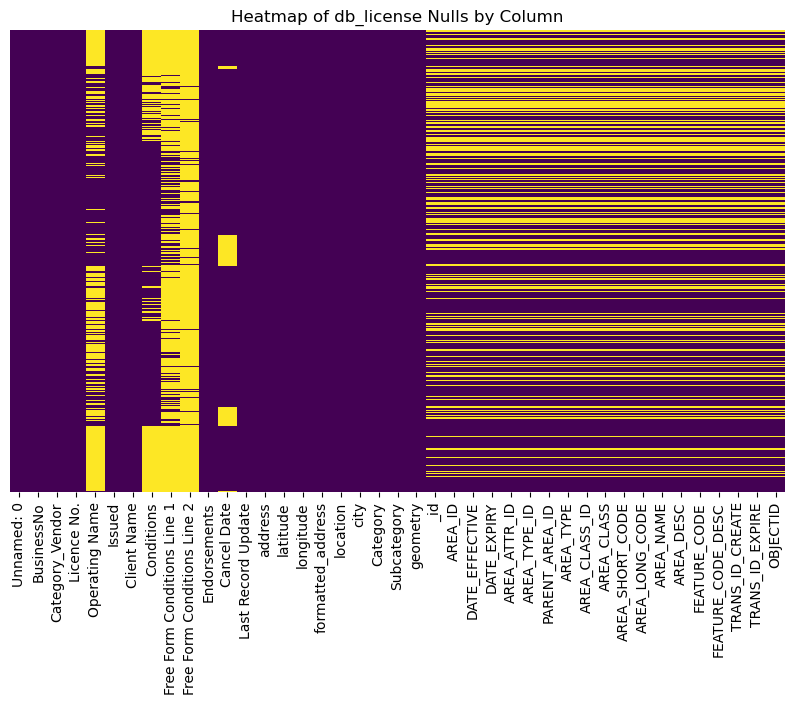

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(join.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of db_license Nulls by Column')
plt.show()

In [30]:
join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3332 entries, 0 to 3331
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   3332 non-null   int64   
 1   BusinessNo                   3332 non-null   int64   
 2   Category_Vendor              3332 non-null   object  
 3   Licence No.                  3332 non-null   object  
 4   Operating Name               1506 non-null   object  
 5   Issued                       3332 non-null   object  
 6   Client Name                  3332 non-null   object  
 7   Conditions                   2151 non-null   object  
 8   Free Form Conditions Line 1  767 non-null    object  
 9   Free Form Conditions Line 2  199 non-null    object  
 10  Endorsements                 3332 non-null   object  
 11  Cancel Date                  2946 non-null   object  
 12  Last Record Update           3332 non-null   object  


In [33]:
join[~join.AREA_ID.isna()].info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2186 entries, 1 to 3331
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   2186 non-null   int64   
 1   BusinessNo                   2186 non-null   int64   
 2   Category_Vendor              2186 non-null   object  
 3   Licence No.                  2186 non-null   object  
 4   Operating Name               882 non-null    object  
 5   Issued                       2186 non-null   object  
 6   Client Name                  2186 non-null   object  
 7   Conditions                   1369 non-null   object  
 8   Free Form Conditions Line 1  458 non-null    object  
 9   Free Form Conditions Line 2  111 non-null    object  
 10  Endorsements                 2186 non-null   object  
 11  Cancel Date                  1905 non-null   object  
 12  Last Record Update           2186 non-null   object  


In [20]:
# Create a map using Plotly Express
fig = px.scatter_mapbox(join, lat='latitude', lon='longitude',
                        hover_name='Operating Name',  # Changes what appears on hover
                        mapbox_style="open-street-map",  # or "carto-positron", "stamen-terrain", etc.
                        hover_data=['Licence No.', 'Issued', 'Cancel Date', 'address', 'Client Name'],
                        color='AREA_NAME',
                        zoom=9)  # Initial zoom level

fig.show()

In [35]:
join[~join.AREA_ID.isna()].to_csv("df_wards.csv")